# Mathematical computating using SciPy
The SciPy library contains lots of powerful tools for various tasks in mathematics, statistics and signal processing. Many of these functions are the building blocks for statistical analysis tools. SciPy is used in many of the libraries we covered so far and also offers many useful functionalities.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Linear algebra in Python
SciPy's [`linalg` submodule](https://docs.scipy.org/doc/scipy/reference/linalg.html#linear-algebra-scipy-linalg) includes many useful functions for doing linear algebra. For example it contains functions for computing a determinant, inverting matrices, computing eigenvalues or different decompositions. It also includes multiple solvers for equations systems.

In [2]:
from scipy import linalg

### Matrix inverse
Create a matrix of which we want to get the inverse.

In [3]:
mat = np.array([[ 0, -1, -2], [-1,  2,  3], [ 0,  1,  0]])
mat

array([[ 0, -1, -2],
       [-1,  2,  3],
       [ 0,  1,  0]])

Compute the inverse matrix using `scipy.linalg.inv`.

In [4]:
inv = linalg.inv(mat)
inv

array([[-1.5, -1. ,  0.5],
       [ 0. ,  0. ,  1. ],
       [-0.5,  0. , -0.5]])

The dotproduct of a matrix with its inverse should yield the identity matrix: $XX^{-1}=I$

In [5]:
print('Inverse of inverse equals original matrix?', np.allclose(mat, linalg.inv(inv)))
print(np.dot(inv, mat))
print(mat @ inv)

Inverse of inverse equals original matrix? True
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


We can only compute the inverse of matrices with a determinant unequal 0. Matrices with a determinant of 0 are also called singular matrices.

In [6]:
sing = np.array([[ 1,  2,  3], [-1, -2, -3], [ 0,  1,  0]])
sing

array([[ 1,  2,  3],
       [-1, -2, -3],
       [ 0,  1,  0]])

In [8]:
linalg.det(sing)

-1.6653345369377348e-16

SciPy will check if the matrix is singular and throws an error if we try to invert it.

In [9]:
linalg.inv(sing)

LinAlgError: singular matrix

### Solving linear equations
The [`scipy.linalg.solve` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy-linalg-solve) can solve linear equation sets of the form $Ax=b$ fox $x$, given a square matrix $a$ and vector/matrix $b$.

$
A=\pmatrix{a_{11} & a_{12} \\ a_{21} & a_{22}}=\pmatrix{-2 & 6 \\ 4 & 2}\\
b=\pmatrix{b_1 \\ b_2}=\pmatrix{3 \\ -2}\\
x=\pmatrix{x_1 \\ x_2}
$

What are the values for $x$ such that $Ax=b$ is satisfied?

$
\pmatrix{-2x_1 & 6x_2 \\ 4x_1 & 2x_2}=\pmatrix{3 \\ -2}
$

Create NumPy arrays for $A$ and $b$.

In [10]:
A = np.array([[-2, 6], [4, 2]])
A

array([[-2,  6],
       [ 4,  2]])

In [11]:
b = np.array([3, -2])
b

array([ 3, -2])

Solve the set of equations for x.

In [12]:
x = linalg.solve(A, b)
x

array([-0.64285714,  0.28571429])

Is the result of $Ax$ really $b$?

In [13]:
A @ x

array([ 3., -2.])

If the set of linear equations has infinitely many solutions (first example) or no solution at all (i.e. is inconsistent, second example), an exception will be raised.

In [14]:
A = np.array([[1, 2], [2, 4]])
b = np.array([1, 2])
print("determinant:", linalg.det(A))
linalg.solve(A,b)

determinant: 0.0


LinAlgError: Matrix is singular.

In [15]:
A = np.array([[1, 1], [1, 1]])
b = np.array([1, 2])
print("determinant:", linalg.det(A))
linalg.solve(A,b)

determinant: 0.0


LinAlgError: Matrix is singular.

Below I tried to intentionally break scipy by choosing an awkward set of equations. To my surprise that worked, the result is clearly wrong. But at least we did get a warning and it seems that due to some rounding issues scipy assumed that the systen was solvable.

Conclusion: Things like this should normally not happen, the problem itself was designed to cause trouble. Nevertheless, when there is a scipy warning we should take it seriously and double check.

<img src="double-check.png" alt="double-check" width="400"/>

In [16]:
A = np.array([[1, 1, 1], [2, 1, 1], [3, 2, 2]])
b = np.array([1, 1, 3])
print("determinant:", linalg.det(A))
x=linalg.solve(A,b)
print(x)
print(A @ x)

determinant: 0.0
[ 0.00000000e+00 -8.11296384e+31  8.11296384e+31]
[0. 0. 0.]


/tmp/ipykernel_6705/4101651616.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=1.02716e-33): result may not be accurate.
  x=linalg.solve(A,b)


### Eigenvalue decomposition
SciPy includes multiple functions for computing the eigenvalues of a matrix (https://docs.scipy.org/doc/scipy/reference/linalg.html#eigenvalue-problems). Let's have a look at the `eig` function, which returns the eigenvalues and eigenvectors of a matrix.

The eigenvalues of a matrix $M$ are scalars by which an eigenvector $v$ of $M$ is scaled when $v$ is transformed by $M$. An eigenvector $v$ of $M$ is a vector for which the product of $M$ and $v$ is a scaled version of $v$ (no rotation).
Generally, this can be written as $$Mv=\lambda v$$ where $v$ is an eigenvector of $M$ and $\lambda$ is the corresponding eigenvalue.

Create an example matrix $M$.

In [17]:
M = np.array([[1, 0.75], [0, -0.5]])
M

array([[ 1.  ,  0.75],
       [ 0.  , -0.5 ]])

Plotting for vectors with an arbitrary vector $x$ (no eigenvector) transformed by $M$.

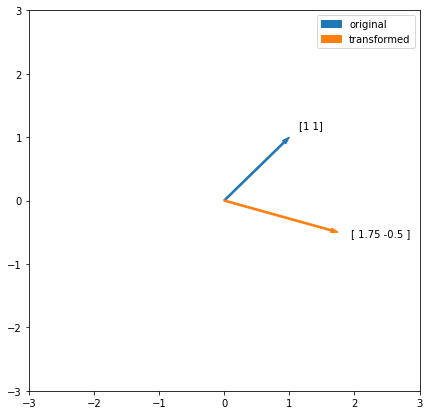

In [18]:
def draw_vectors(vecs, labels=None, ax=None, **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=(7, 7))
        
    arrows = []
    for i, vec in enumerate(vecs):
        color = f'C{i}'
        arrows.append(ax.arrow(0, 0, *vec, width=0.025, length_includes_head=True, ec=color, fc=color))
        ax.annotate(str(vec), xy=vec + 0.2 * vec / linalg.norm(vec))
    
    ax.set(xlim=(-3, 3), ylim=(-3, 3), **kwargs)
    
    if labels is not None:
        plt.legend(arrows, labels)

x = np.array([1, 1])
draw_vectors([x, M @ x], ['original', 'transformed'])

In [21]:
eigvals, eigvecs = linalg.eig(M)
eigvecs = eigvecs.T
eigvals, eigvecs

(array([ 1. +0.j, -0.5+0.j]),
 array([[ 1.        ,  0.        ],
        [-0.4472136 ,  0.89442719]]))

In the right hand figure we can see $Mv$. Multiplying $M$ with the second eigenvector $(-0.4472..., 0.8944...)$ will result in $(0.2236..., -0.4472...)$ (orange arrow). This is the same as multiplying $(-0.4472..., 0.8944...)$ with $-0.5$ (the second eigenvalue).

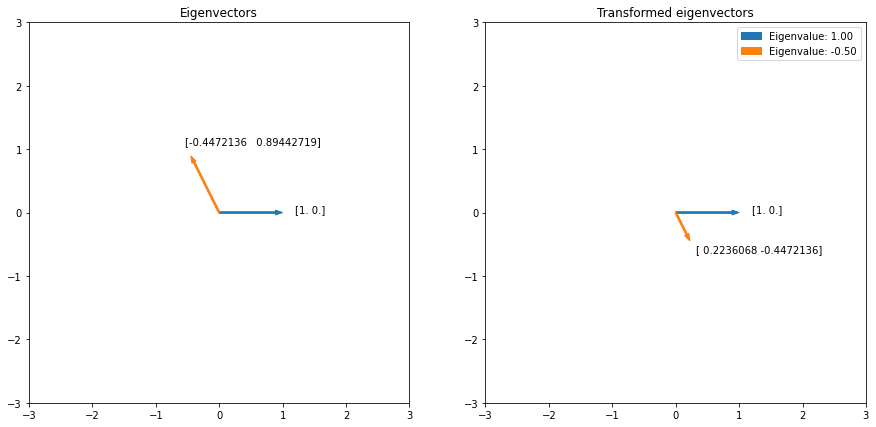

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))
labels = [f'Eigenvalue: {eigval.real:.2f}' for eigval in eigvals]
draw_vectors(eigvecs, labels, title='Eigenvectors', ax=axes[0])
draw_vectors([M @ eigvec for eigvec in eigvecs], title='Transformed eigenvectors', ax=axes[1])
plt.show()

In [23]:
print(eigvals[1]*eigvecs[1])
print(M@eigvecs[1])

[ 0.2236068-0.j -0.4472136+0.j]
[ 0.2236068 -0.4472136]


Eigenvalues will be complex values. If we do not care about its imaginary part (e.g. when it is 0), we can use the field ``.real`` of the complex number (or the whole list of complex numbers).

In [24]:
print(eigvals)
print(eigvals.real)

[ 1. +0.j -0.5+0.j]
[ 1.  -0.5]


SciPy's `.eig()` function is able to compute left and right eigenvectors. The most typical eigenvectors are right eigenvectors which are of the form $Mv=\lambda v$, while left eigenvectors correspond to $vM=\lambda v$.

In [46]:
eigvals, eigvecs = linalg.eig(M, left=False, right=True)
eigval, eigvec = eigvals[0].real, eigvecs.T[0]

print('First eigenvector:', eigvec)
print('First eigenvalue:', eigval)

print('Mv / lambda =', M @ eigvec / eigval)
print('vM / lambda =', eigvec @ M / eigval)

First eigenvector: [1. 0.]
First eigenvalue: 1.0
Mv / lambda = [1. 0.]
vM / lambda = [1.   0.75]


By default `left=False` and `right=True`, since right eigenvalues are more common than left eigenvalues.

In [27]:
eigvals, eigvecs = linalg.eig(M, left=True, right=False)
eigval, eigvec = eigvals[0].real, eigvecs.T[0]

print('First eigenvector:', eigvec)
print('First eigenvalue:', eigval)

print('Mv / lambda =', M @ eigvec / eigval)
print('vM / lambda =', eigvec @ M / eigval)

First eigenvector: [0.89442719 0.4472136 ]
First eigenvalue: 1.0
Mv / lambda = [ 1.22983739 -0.2236068 ]
vM / lambda = [0.89442719 0.4472136 ]


We can also get both at the same time.

In [ ]:
linalg.eig(M, left=True, right=True)

### Overlap with NumPy
The NumPy library also has a submodule called `linalg` which has some overlap with SciPy's `linalg` submodule (such as eigenvalue decomposition or linear equation solvers) but the SciPy submodule contains far more functions for different applications of linear algebra.

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

SciPy always returns the eigenvalues as a complex array while NumPy returns a real valued array if the eigenvalues are all real.

In [ ]:
sp_eval, sp_evec = linalg.eig(x)
np_eval, np_evec = np.linalg.eig(x)

sp_eval, np_eval

In [ ]:
print('Eigenvalues form SciPy and NumPy match:', np.allclose(sp_eval, np_eval))
print('Eigenvectors from SciPy and NumPy match:', np.allclose(sp_evec, np_evec))

## Numerical calculus in Python

### Integrating
SciPy has a dedicated [submodule](https://docs.scipy.org/doc/scipy/reference/integrate.html#integration-and-odes-scipy-integrate) just for integrating called `integrate`. It contains functions for integrating multiple times in one go and even supports integration and solvers for ordinary differential equations.

In [28]:
from scipy import integrate

Here we will only have a look at the [`integrate.quad` function](https://docs.scipy.org/doc/scipy/reference/integrate.html), which can be used to compute a definite integral of some function.

In [29]:
def draw_integral(x, y, limits, integral, err, **kwargs):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y)
    
    integral_mask = (x >= limits[0]) & (x < limits[1])
    ax.fill_between(x[integral_mask], y[integral_mask], alpha=0.2)
    
    ax.axhline(0, c='black', alpha=0.5)
    ax.axvline(limits[0], c='black')
    ax.axvline(limits[1], c='black')
    
    ax.set(title=f'Integral result: {integral:.3f} (error: {err:.3g})', **kwargs)
    plt.show()

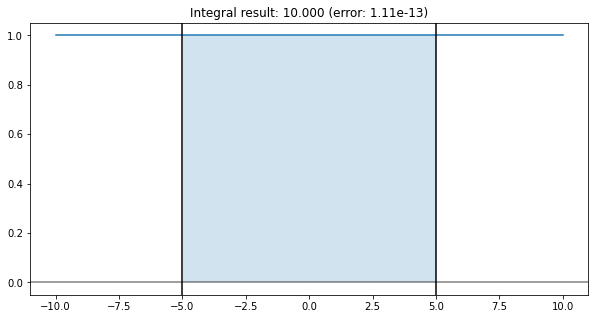

In [30]:
func = lambda x: 1

x = np.linspace(-10, 10, 1000)
y = np.array(list(map(func, x)))

limits = (-5, 5)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

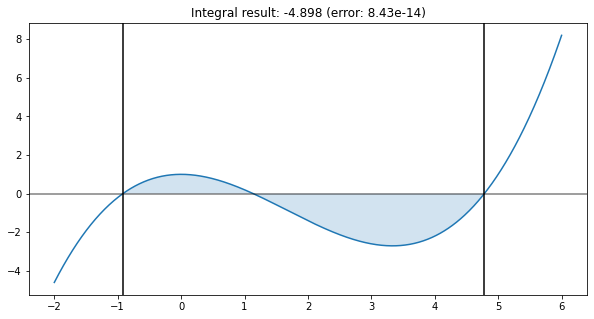

In [31]:
func = lambda x: 0.2 * x**3 - x**2 + 1

x = np.linspace(-2, 6, 1000)
y = np.array(list(map(func, x)))

limits = (-0.919, 4.781)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

It is possible to use ``quad`` for computing an indefinite integral using ``np.inf``

/tmp/ipykernel_6705/2219932405.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, err = integrate.quad(func, *limits)


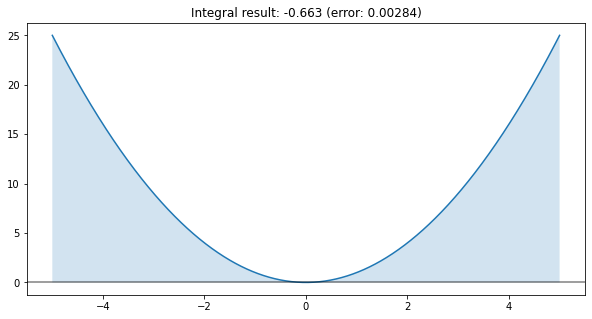

In [34]:
from scipy.stats import norm
func = norm.pdf

x = np.linspace(-5, 5, 1000)
y = np.array(list(map(func, x)))

limits = (-np.inf, np.inf)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

The `quad` function is numerically estimating the integration. Imagine it like if scipy was counting the pixels under the curve. It is therefore able to integrate some non-integratable functions but results might not be 100% accurate. Note: Truly non-integrable functions are impossible in programming. They have to be based on irrational numbers (or some other uncountable set) and no computer in the world is able to encode the actual values. 

/tmp/ipykernel_6705/1427445764.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, err = integrate.quad(func, *limits)


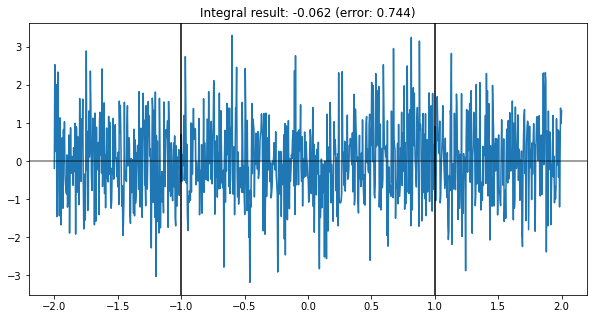

In [35]:
# Note: this is not a mathematical function, scipy can still "integrate"
func = lambda x: np.random.randn()

x = np.linspace(-2, 2, 1000)
y = np.array(list(map(func, x)))

limits = (-1, 1)
integral, err = integrate.quad(func, *limits)
draw_integral(x, y, limits, integral, err)

### Derivatives

In [36]:
from scipy import misc

SciPy has a function to estimate the derivative of any function at a certain location. The function if called `derivative` and is located in the `misc` submodule.

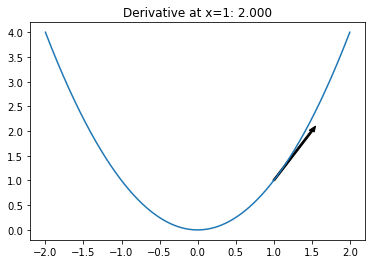

In [37]:
func = lambda x: x ** 2

xs = np.linspace(-2, 2, 1000)
ys = func(xs)

x = 1
y = func(x)
dy = misc.derivative(func, x)
dx = 1

plt.plot(xs, ys)
plt.arrow(x, y, dx / 2, dy / 2, width=0.025, fc='black')
plt.title(f'Derivative at x={x}: {dy:.3f}')
plt.show()

### Optimization

In [38]:
from scipy import optimize

The `minimize_scalar` function takes a univariate function as an argument. `minimize_scalar` minimizes the input variable with respect to the function's output. An `OptimizeResult` is returned, which includes information about the optimization process, e.g. if it succeeded, what the minimal function value was and where this minimum was found.

In [39]:
func = lambda x: x ** 2 + 1
result = optimize.minimize_scalar(func)
print(type(result))
print(result)
print(result.x)
print(result['x'])

<class 'scipy.optimize.optimize.OptimizeResult'>
     fun: 1.0
    nfev: 40
     nit: 36
 success: True
       x: 9.803862664247969e-09
9.803862664247969e-09
9.803862664247969e-09


     fun: -5.5130952878978565
    nfev: 15
     nit: 11
 success: True
       x: 1.5079166128287065


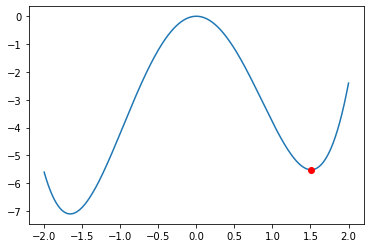

In [40]:
func = lambda x: x ** 4 + 0.2 * x ** 3 - 5 * x ** 2

xs = np.linspace(-2, 2, 1000)
ys = func(xs)

res = optimize.minimize_scalar(func)

print(res)

plt.plot(xs, ys)
plt.plot(res.x, res.fun, 'ro')
plt.show()

     fun: -7.099573462102143
    nfev: 14
     nit: 10
 success: True
       x: -1.657916612061514


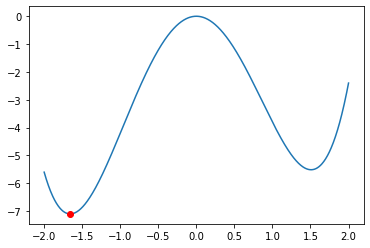

In [41]:
func = lambda x: x ** 4 + 0.2 * x ** 3 - 5 * x ** 2

xs = np.linspace(-2, 2, 1000)
ys = func(xs)

res = optimize.minimize_scalar(func, bracket=[-2, -1])

print(res)

plt.plot(xs, ys)
plt.plot(res.x, res.fun, 'ro')
plt.show()

`scipy.optimize.minimize` can be used to minimize the value of a multivariate function.

      fun: -7.812499999999964
 hess_inv: array([[0.06677216, 0.00017739],
       [0.00017739, 0.10133796]])
      jac: array([ 2.38418579e-07, -7.74860382e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([ 2.50000000e+00, -8.51935269e-08])


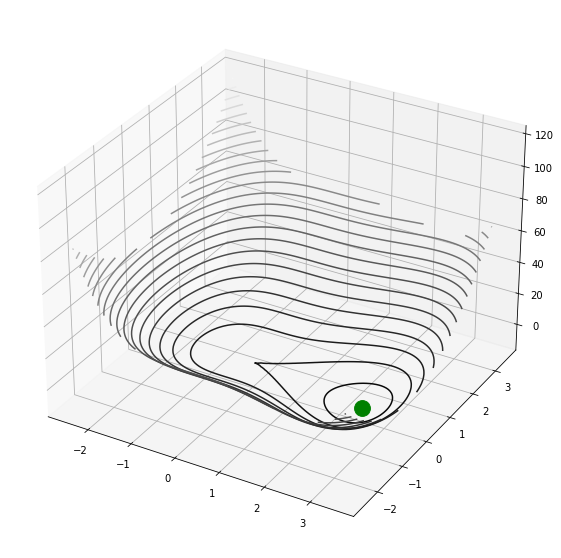

In [42]:
func = lambda var: 0.6 * var[0]**4 - 2 * var[0]**3 + 5 * var[1]**2

res = optimize.minimize(func, (1, 1))
print(res)
vals = np.linspace(-2.5, 3.5, 100)
xs, ys = np.meshgrid(vals, vals)
zs = np.empty(xs.shape)
for i, j in np.ndindex(xs.shape):
    zs[i,j] = func((xs[i,j], ys[i,j]))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.contour(xs, ys, zs, 25, cmap='gray')
ax.scatter(*res.x, res.fun, c='g', s=250, marker='o')

plt.show()

Additionally to finding minimums, the `optimize` submodule can also find the roots of functions.

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.596968283237326


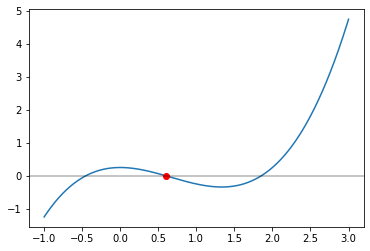

In [45]:
func = lambda x: 0.5 * x ** 3 - x ** 2 + 0.25

xs = np.linspace(-1, 3, 1000)
ys = func(xs)

# One alternative to using x0 and x1 is using the "bracket" keyword argument, again
res = optimize.root_scalar(func, x0=1, x1=3)

print(res)

plt.plot(xs, ys)
plt.plot(res.root, func(res.root), 'ro')
plt.axhline(0, c='black', alpha=0.3)
plt.show()

## Raccoons
The [`misc` submodule](https://docs.scipy.org/doc/scipy/reference/misc.html#miscellaneous-routines-scipy-misc) contains the function `face` which will return an image of a raccoon as a NumPy array.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

ax1.imshow(misc.face())
ax2.imshow(misc.face(gray=True), cmap='gray')

ax1.axis('off')
ax2.axis('off')
plt.show()